#Section 1 - Data Exploration

##1.1 Loading the Data

In [3]:
import pandas as pd

# Load the Dataset from the Drive
data = pd.read_csv('/content/drive/MyDrive/DataSet/cars_price (1) - cars_price (1).csv')

# Display Dataset shape
print('Display the Shape:')
data.shape


Display the Shape:


(30330, 26)

In [7]:
print('Display the First Five Row:')
print(data.head())

print('\nDescriptive Statistics for Numerical Columns:')
print(data.describe())

print('\nDescriptive Statistics for Categorical Columns:')
print(data.describe(include=['object']))

print('\nDisplay the data type of all columns:')
print(data.info())

print('\nCheck for Missing Values:')
print(data.isnull().sum())

Display the First Five Row:
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0        3.0               NaN  alfa-romero       gas        std          two   
1        3.0                 ?  alfa-romero       gas        std          two   
2        1.0                 ?  alfa-romero       gas        std          two   
3        2.0               164         audi       gas        std         four   
4        2.0               164         audi       gas        std          NaN   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          NaN   
1  convertible          rwd           front        88.6  ...        130.0   
2    hatchback          rwd             NaN        94.5  ...        152.0   
3        sedan          fwd           front        99.8  ...        109.0   
4        sedan          4wd           front        99.4  ...        136.0   

   fuel-system  bore  

In [8]:
print('Check the data types:')

print(data.dtypes)

Check the data types:
symboling            float64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg          float64
price                 object
dtype: object


In [54]:
# Converting price, peak-rpm, and horsepower dtype into float64

convert_dtype = ['price', 'peak-rpm', 'horsepower']

for col in convert_dtype:
  data[col] = pd.to_numeric(data[col], errors='coerce')

print(data.dtypes)


symboling            float64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object


In [55]:
numerical_cols = data.select_dtypes(include=['int64','float64']).columns

categorical_cols = data.select_dtypes(include=['object']).columns

print('Numerical Columns:')
print(numerical_cols)

print('\nCategorical Columns:')
print(categorical_cols)

Numerical Columns:
Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

Categorical Columns:
Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke'],
      dtype='object')


## Insight Section 1.1

In this section, the dataset was successfully loaded and explored at a basic level. We identified the structure, presence of missing values, and classified features into numerical and categorical types. This foundational understanding is essential before performing statistical analysis, visualization, and machine learning modeling.

##1.2 Statistical Summary and Distributions

In [56]:
# Statistical Summary for numerical columns

print('Statistical Summary for Numerical Columns:')
print(data[numerical_cols].describe())

Statistical Summary for Numerical Columns:
          symboling    wheel-base        length         width        height  \
count  27286.000000  27264.000000  27258.000000  27387.000000  27281.000000   
mean       0.839075     98.807875    174.158302     65.918114     53.732059   
std        1.239600      6.037800     12.366150      2.143679      2.438541   
min       -2.000000     86.600000    141.100000     60.300000     47.800000   
25%        0.000000     94.500000    166.300000     64.100000     52.000000   
50%        1.000000     97.000000    173.200000     65.500000     54.100000   
75%        2.000000    102.400000    183.500000     66.900000     55.500000   
max        3.000000    120.900000    208.100000     72.300000     59.800000   

        curb-weight   engine-size  compression-ratio    horsepower  \
count  27302.000000  27271.000000       27327.000000  26922.000000   
mean    2560.265988    127.322834          10.128243    104.631342   
std      522.483478     41.863332  

- Car prices show a wide range, indicating the presence of both low-cost and high-end vehicles

- Features such as engine size, horsepower, and mileage vary significantly, suggesting they may strongly influence price.

- Large difference between mean and max values hint at possible outliers, especially in price-related features



In [57]:
# Unique Values per Columns

print('\nUnique Values per Columns:')

for col in data.columns:
  unique_values = data[col].nunique()
  print(f'{col}: {unique_values}')


Unique Values per Columns:
symboling: 6
normalized-losses: 52
make: 22
fuel-type: 2
aspiration: 2
num-of-doors: 3
body-style: 5
drive-wheels: 3
engine-location: 2
wheel-base: 53
length: 75
width: 44
height: 49
curb-weight: 171
engine-type: 7
num-of-cylinders: 7
engine-size: 44
fuel-system: 8
bore: 39
stroke: 37
compression-ratio: 32
horsepower: 59
peak-rpm: 23
city-mpg: 29
highway-mpg: 30
price: 186


In [58]:
# Unique Count per Column

for col in data.columns:
  print(f'{col}: {data[col].value_counts()}')
  print('----------------------------------')

symboling: symboling
 0.0    9016
 1.0    7131
 2.0    4258
 3.0    3624
-1.0    2890
-2.0     367
Name: count, dtype: int64
----------------------------------
normalized-losses: normalized-losses
?      5526
161    1543
91     1042
150     936
104     840
134     788
128     759
102     725
94      698
168     651
85      648
65      641
95      630
74      626
103     621
93      565
106     548
148     526
122     523
118     504
125     423
137     395
83      389
115     387
154     382
101     367
197     300
145     288
188     284
153     284
108     277
113     277
119     276
110     268
194     268
81      267
129     265
89      263
87      257
158     245
164     238
192     236
121     147
256     144
77      144
231     135
98      128
78      128
90      127
186     127
142     127
107     111
Name: count, dtype: int64
----------------------------------
make: make
toyota           4229
nissan           2338
mazda            2277
mitsubishi       1796
honda            16

In [59]:
# Percentage of Missing Values

print('Percentage of Missing Values:')

missing_values = data.isnull().sum()
missing_values_percentage = (missing_values / len(data)) * 100

print(missing_values_percentage)

Percentage of Missing Values:
symboling            10.036268
normalized-losses    10.009891
make                 10.227498
fuel-type             9.960435
aspiration            9.808770
num-of-doors          9.920870
body-style            9.904385
drive-wheels         10.270359
engine-location       9.818661
wheel-base           10.108803
length               10.128586
width                 9.703264
height               10.052753
curb-weight           9.983515
engine-type          10.039565
num-of-cylinders      9.996703
engine-size          10.085724
fuel-system          10.158259
bore                  9.749423
stroke                9.630729
compression-ratio     9.901088
horsepower           11.236400
peak-rpm             10.712166
city-mpg             10.224200
highway-mpg           9.980218
price                11.889219
dtype: float64


In [60]:
# Missing Values and Percentage for Numerical Columns

print('\nMissing Values for Numerical Columns:')

for col in numerical_cols:
  missing_values = data[col].isnull().sum()
  print(f'{col}: {missing_values}')

  missing_values_percentage = (missing_values / len(data)) * 100
  print(f'{col}: {missing_values_percentage.round(2)}%')
  print('----------------------------------')


Missing Values for Numerical Columns:
symboling: 3044
symboling: 10.04%
----------------------------------
wheel-base: 3066
wheel-base: 10.11%
----------------------------------
length: 3072
length: 10.13%
----------------------------------
width: 2943
width: 9.7%
----------------------------------
height: 3049
height: 10.05%
----------------------------------
curb-weight: 3028
curb-weight: 9.98%
----------------------------------
engine-size: 3059
engine-size: 10.09%
----------------------------------
compression-ratio: 3003
compression-ratio: 9.9%
----------------------------------
horsepower: 3408
horsepower: 11.24%
----------------------------------
peak-rpm: 3249
peak-rpm: 10.71%
----------------------------------
city-mpg: 3101
city-mpg: 10.22%
----------------------------------
highway-mpg: 3027
highway-mpg: 9.98%
----------------------------------
price: 3606
price: 11.89%
----------------------------------


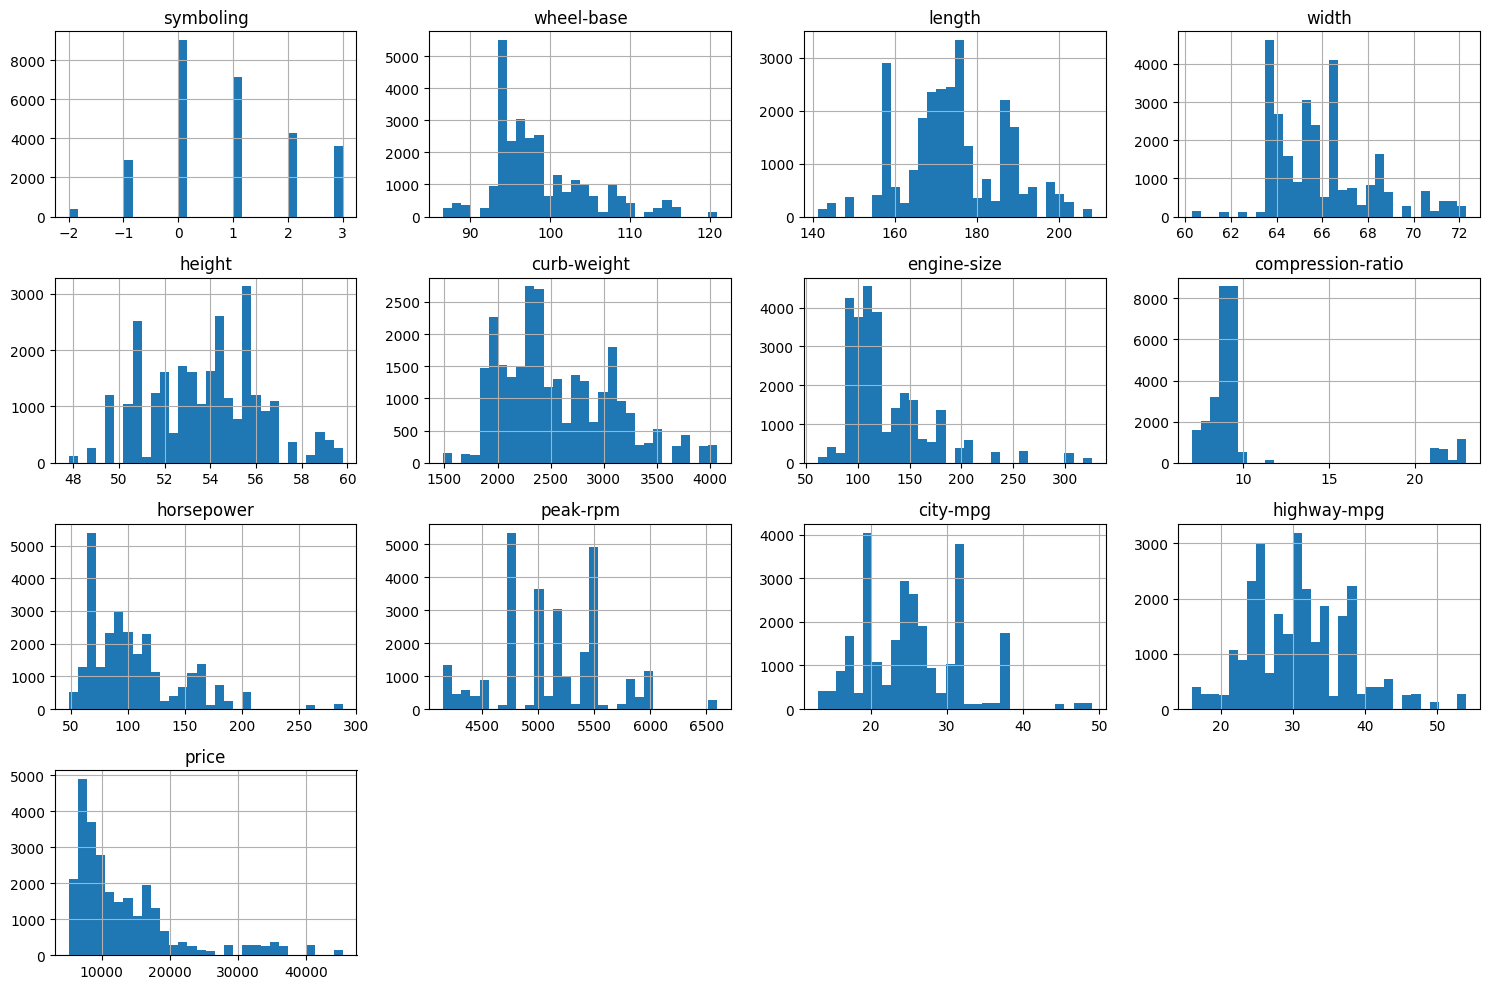

In [61]:
# Checking Histogram Analysis to check either Skewed Or Normal Distribution
import matplotlib.pyplot as plt

data[numerical_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()

plt.show()

- Most numerical features show skewed distributions

- Car price distribution is not normal, a small number of cars have very high prices

In [62]:
for col in numerical_cols:
  median = data[col].median()
  print(f'{col}: {median}')

symboling: 1.0
wheel-base: 97.0
length: 173.2
width: 65.5
height: 54.1
curb-weight: 2414.0
engine-size: 120.0
compression-ratio: 9.0
horsepower: 95.0
peak-rpm: 5200.0
city-mpg: 24.0
highway-mpg: 30.0
price: 10295.0


In [46]:
data['symboling'].dtypes

dtype('float64')

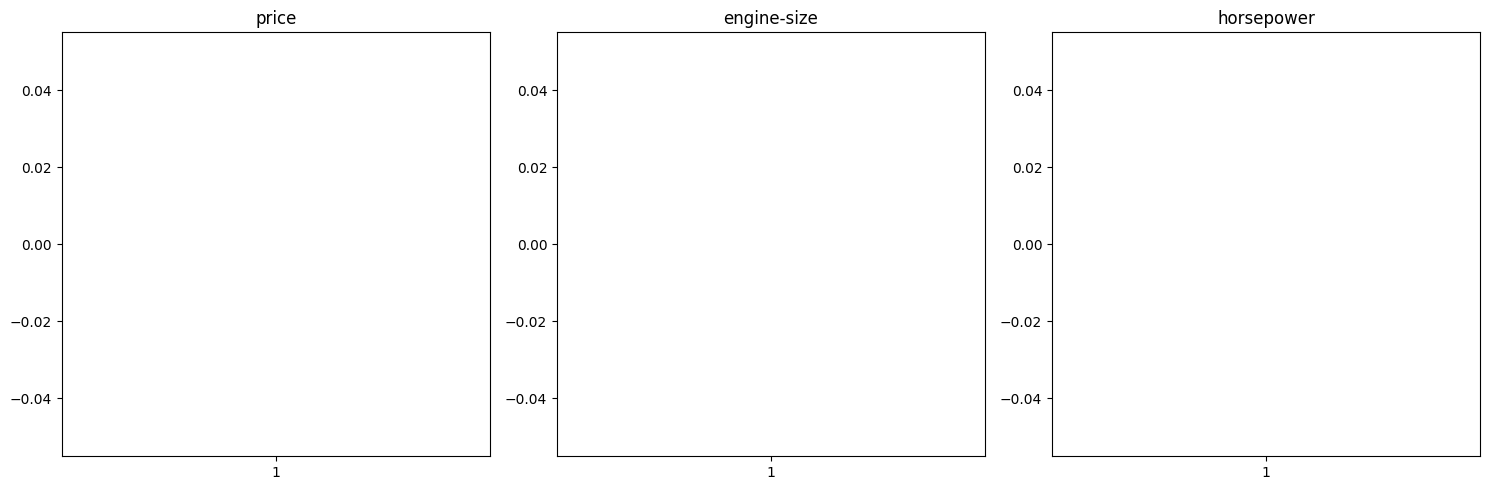

In [63]:
# Checking Boxplot for Outliers

three_numeric_cols = ['price','engine-size','horsepower']

plt.figure(figsize=(15, 5))
for col in three_numeric_cols:
  plt.subplot(1, 3, three_numeric_cols.index(col) + 1)
  plt.boxplot(data[col])
  plt.title(col)

plt.tight_layout()
plt.show()

- Missing Values that's boxplot shows nothing

##Section 1.2 Insight

This section revealed that car price and engine-related features have wide distributions and noticeable outliers. The data is not normally distributed, and extreme values exist, which can affect regression performance. These findings justify the need for feature scaling, careful model selection, and potentially hyperparameter tuning in later stages.

##1.3 Relationships Between Features

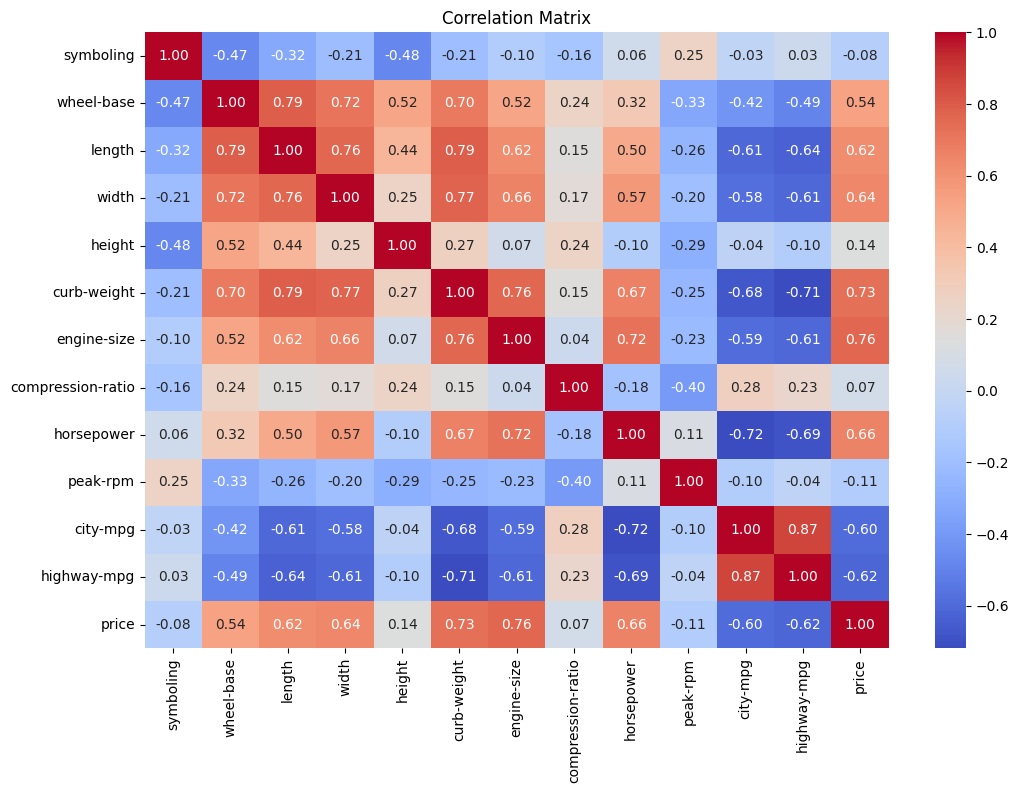

,price
price,1.000000
engine-size,0.762272
curb-weight,0.729870
horsepower,0.661226
width,0.641442
length,0.621123
wheel-base,0.535267
height,0.136370
compression-ratio,0.070575
symboling,-0.084606


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix (numerical cols only)
corr_matrix = data[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Correlation with price
price_corr = corr_matrix['price'].sort_values(ascending=False)
price_corr


## Insight

- Features such as engize size, horsepower, curb weight and wheel base show strong positive correlation with price

- Mileage-related features (city/highway mpg) are negatively correlated with price

- These highly correlated  features are strong candidates for regression models.

- Correlation Analysis helps in feature selection and reducing irrelevant variables

In [65]:
fuel_price_pivot = pd.pivot_table(
    data,
    values='price',
    index='fuel-type',
    columns='aspiration',
    aggfunc='mean'
)

fuel_price_pivot

aspiration,std,turbo
fuel-type,,
diesel,9828.224490,19252.123863
gas,12675.722948,14573.238421


#Insight

- Cars with diesel engines generally have a higher average price compared to gasoline car

- Fuel type should be considered an important categorical feature during modeling.

In [66]:
brand_avg_price = data.groupby('make')['price'].mean().sort_values(ascending=False)

brand_avg_price

,price
make,
jaguar,34389.893617
mercedes-benz,33518.010406
porsche,31299.036036
bmw,26720.230461
volvo,18120.512924
audi,17844.668142
mercury,16503.000000
alfa-romero,15492.829670
peugot,15450.178704


#Insight

- Premium brands such as BMW, Mercedes-Benz, and Jaguar have significantly higher average prices.

- Economy brands like Toyota, Honda, and Mazda show lower average prices.

- Brand plays a major role in price determination and must be encoded carefully for machine learning models.

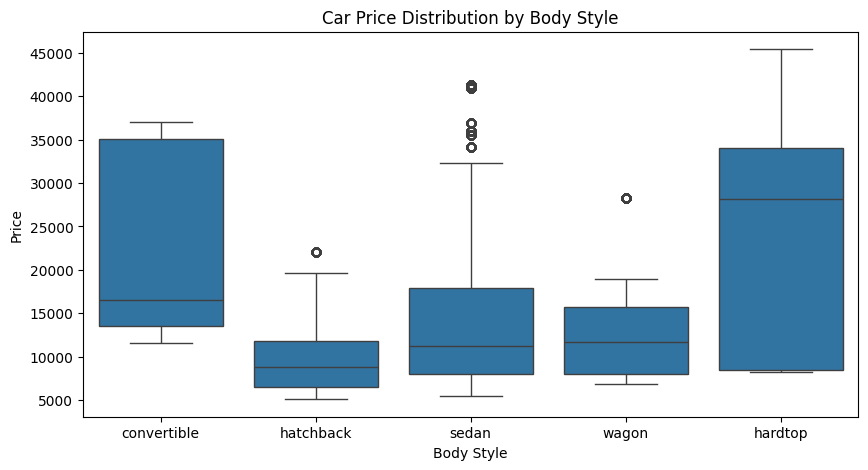

In [68]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='body-style', y='price', data=data)
plt.title("Car Price Distribution by Body Style")
plt.xlabel("Body Style")
plt.ylabel("Price")
plt.show()

##Insight:

- Convertibles and hardtops tend to have higher prices due to luxury and design factors.

- Sedans show a wide price range

- Hatchbacks and wagons generally fall into lower price ranges

- Body style significantly influences car pricing and should be included in predictive models.


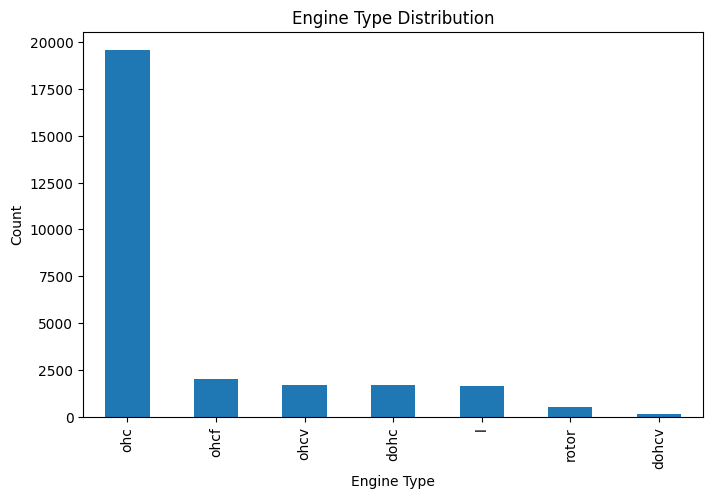

In [70]:
engine_type_counts = data['engine-type'].value_counts()

plt.figure(figsize=(8, 5))
engine_type_counts.plot(kind='bar')
plt.title("Engine Type Distribution")
plt.xlabel("Engine Type")
plt.ylabel("Count")
plt.show()

##Insight

- The most common engine type in the dataset is OHC, indicating its popularity in the car market.

- Less frequent engine types (e.g., DOHC, rotor) are niche or performance-based.

- Frequency analysis helps understand market trends and dataset balance.

##Insight (Section 1.3)

This section revealed strong relationships between car price and technical features such as engine size, horsepower, and weight. Brand, fuel type, body style, and engine type also significantly influence pricing. These findings justify selecting these features for predictive modeling and highlight why both numerical and categorical variables must be handled carefully during preprocessing.

#Section 2 - Data Proprocessing

##2.1 Handling Missing Values

In [71]:
# Calculate missing values count and percentage

missing_data = pd.DataFrame({
    'Missing Count': data.isnull().sum(),
    'Missing Percentage': (data.isnull().sum() / len(data)) * 100
})


# Display only Columns with Missing values

missing_data[missing_data['Missing Count'] > 0]

,Missing Count,Missing Percentage
symboling,3044,10.036268
normalized-losses,3036,10.009891
make,3102,10.227498
fuel-type,3021,9.960435
aspiration,2975,9.808770
num-of-doors,3009,9.920870
body-style,3004,9.904385
drive-wheels,3115,10.270359
engine-location,2978,9.818661
wheel-base,3066,10.108803


In [72]:
numerical_cols_with_missing = data.select_dtypes(include=['int64','float64']).columns

for col in numerical_cols_with_missing:
  data[col].fillna(data[col].median(), inplace=True)

/tmp/ipython-input-3390420870.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


##Insight

- Using the median preserves the central tendency of skewed numerical features and prevents outliers from biasing the imputed values.

In [73]:
data[numerical_cols].isnull().sum()

,0
symboling,0
wheel-base,0
length,0
width,0
height,0
curb-weight,0
engine-size,0
compression-ratio,0
horsepower,0
peak-rpm,0


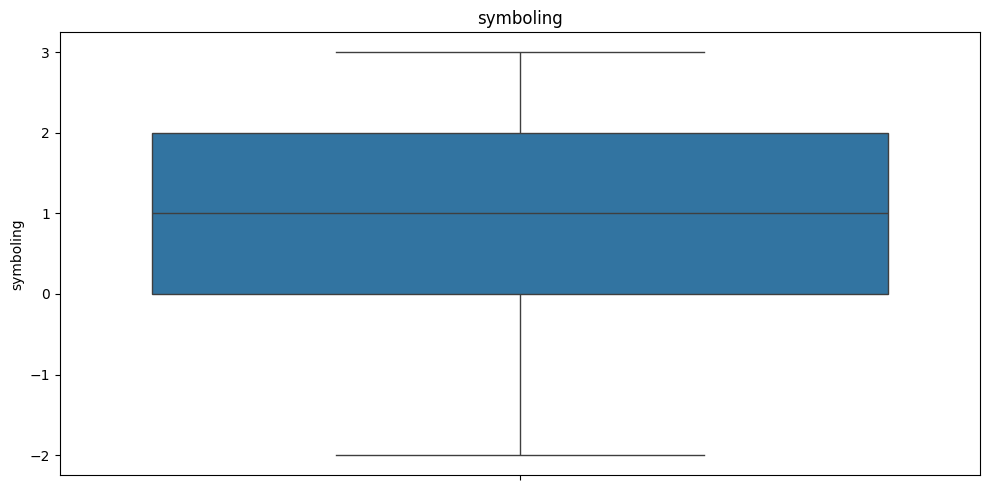

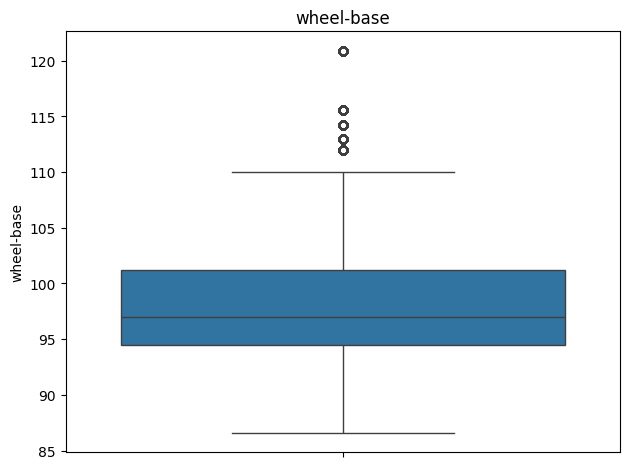

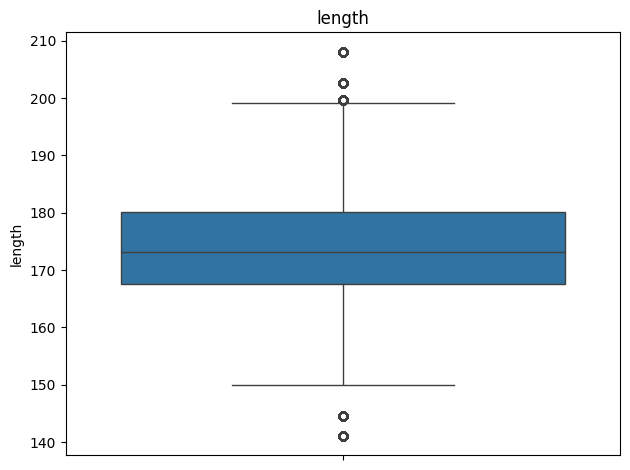

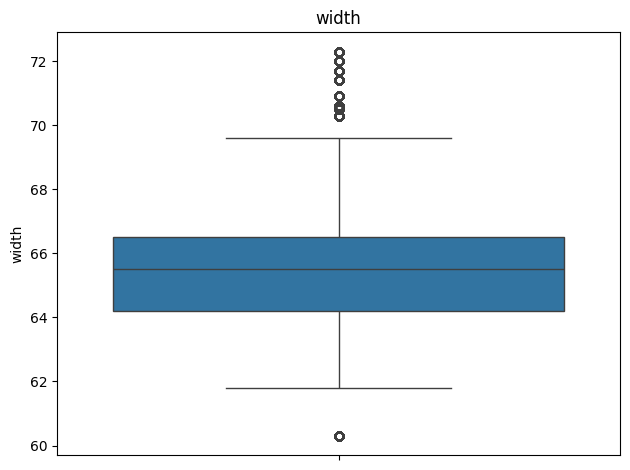

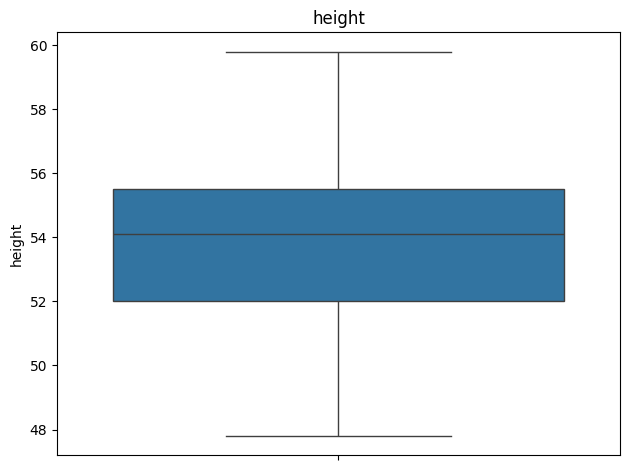

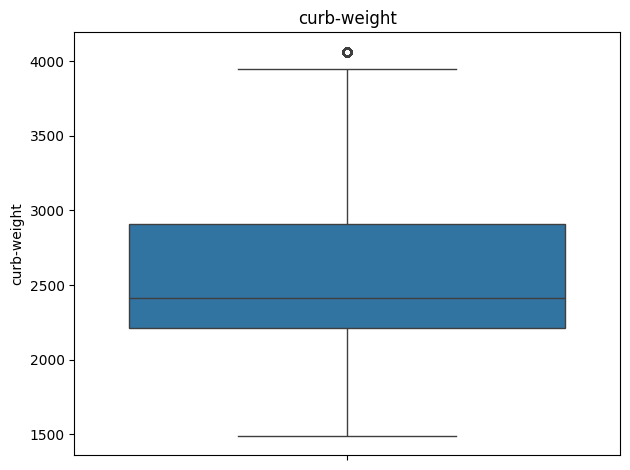

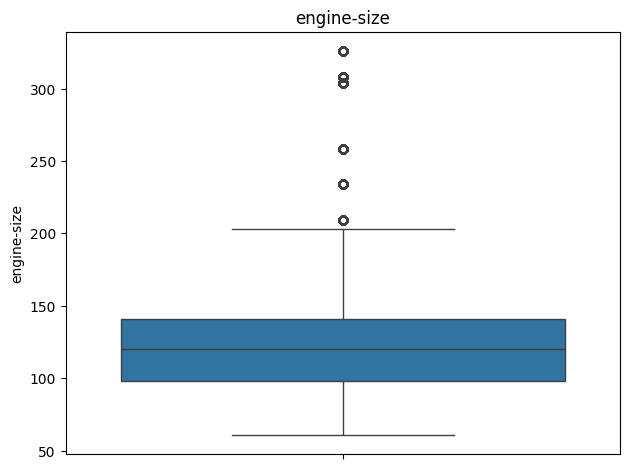

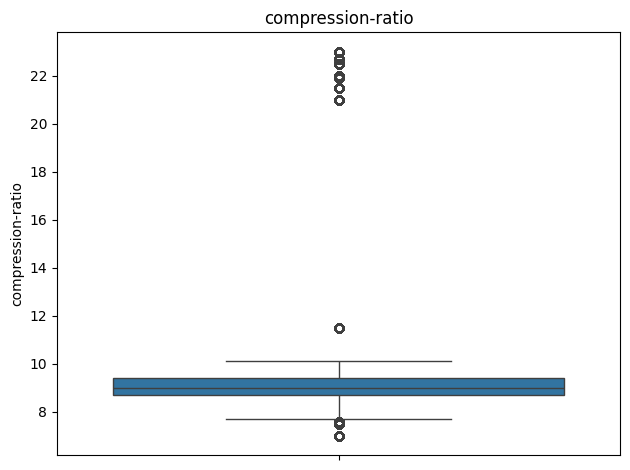

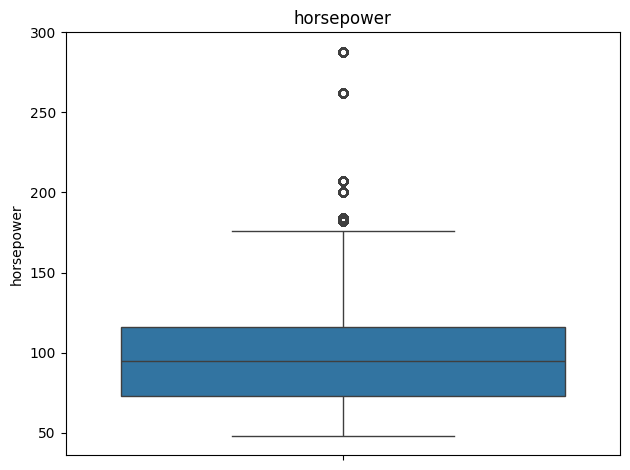

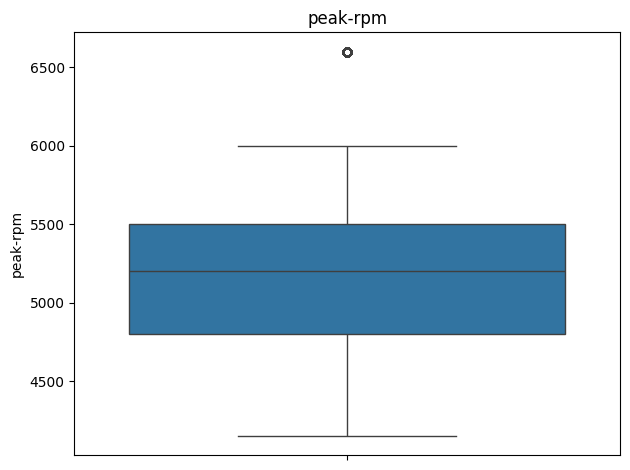

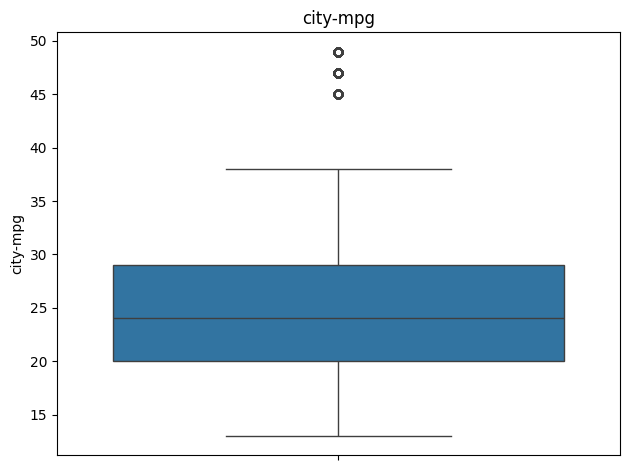

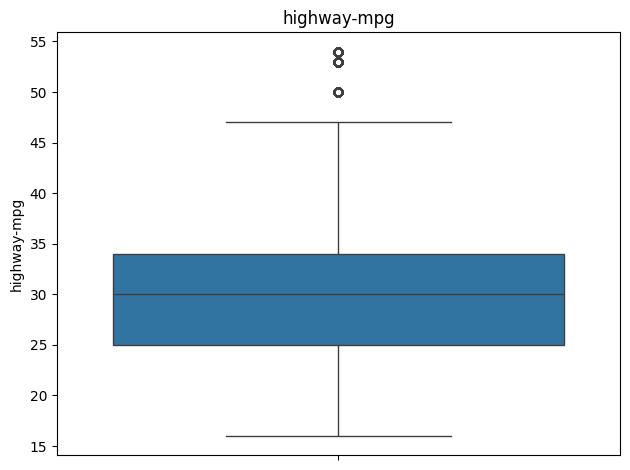

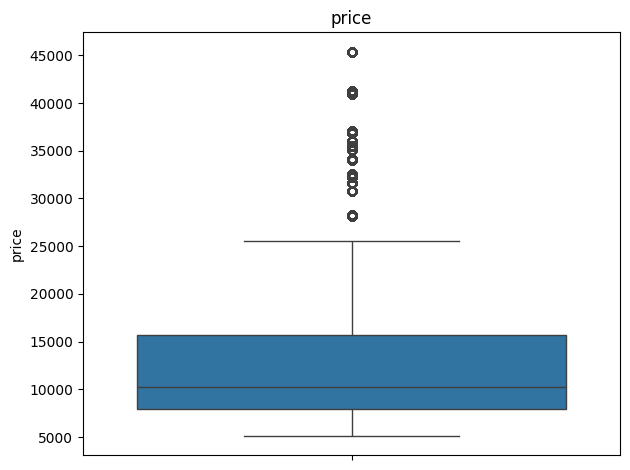

In [75]:
plt.figure(figsize=(10, 5))

for col in numerical_cols:
  sns.boxplot(data[col])
  plt.title(col)

  plt.tight_layout()
  plt.show()

In [76]:
# Strategy for missing Categorical Values

categorical_cols_with_na = data.select_dtypes(include=['object']).columns

for col in categorical_cols_with_na:
    data[col].fillna(data[col].mode()[0], inplace=True)


/tmp/ipython-input-703000529.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


##Insight

- Imputing categorical values with mode ensures consistency and avoids introducing artificial categories.

In [78]:
# Checking no missing Values Remain

data.isnull().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


##Insight (Section 2.1)

In this section, missing values were systematically identified and handled using statistically appropriate strategies. Median imputation was applied to numerical features to reduce the impact of outliers, while mode imputation preserved categorical distributions. This preprocessing step ensures data completeness and improves model reliability.

##2.2 Encoding Categorical Features

In [79]:
# Listing Categorical Features that require encoding

categorical_cols

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke'],
      dtype='object')

In [80]:
# Apply One-Hot Encoding

data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,...,stroke_3.47,stroke_3.5,stroke_3.52,stroke_3.54,stroke_3.58,stroke_3.64,stroke_3.86,stroke_3.9,stroke_4.17,stroke_?
0,3.0,88.6,168.8,64.1,54.1,2548.0,120.0,9.0,111.0,5200.0,...,False,False,False,False,False,False,False,False,False,False
1,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,9.0,111.0,5200.0,...,False,False,False,False,False,False,False,False,False,False
2,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,9.0,154.0,5200.0,...,True,False,False,False,False,False,False,False,False,False
3,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,10.0,102.0,5500.0,...,False,False,False,False,False,False,False,False,False,False
4,2.0,99.4,173.2,65.5,54.3,2824.0,136.0,8.0,115.0,5500.0,...,False,False,False,False,False,False,False,False,False,False


##Insight

###After encoding:

- Each categorical feature is transformed into multiple binary columns.

- The dataset becomes fully numerical, making it compatible with regression algorithms.

- Feature space increases, but interpretability and correctness improve.

In [81]:
data_encoded.dtypes

,0
symboling,float64
wheel-base,float64
length,float64
width,float64
height,float64
...,...
stroke_3.64,bool
stroke_3.86,bool
stroke_3.9,bool
stroke_4.17,bool


In [82]:
# Confirm no object types remain
data_encoded.select_dtypes(include=['object']).columns


Index([], dtype='object')

Categorical features were identified and encoded using One-Hot Encoding to avoid introducing misleading ordinal relationships. This transformation ensures model compatibility and preserves categorical distinctions, enabling accurate price prediction.

#Section 2.3 - Feature Scaling And Selection

##1. Identify Features that need scaling (Especially For KNN)

###Features requiring scaling

- engine-size
- horsepower
- peak-rpm
- curb-weight
- city-mpg
- highway-mpg
- wheel-base
- length, width, height


###Why scaling is required

- KNN Regression relies on distance calculations
- Features with larger numeric ranges can dominate distance calculations.
- Without scaling, the model becomes biased toward high-magnitude features


###Insight

Feature scaling ensures that all numerical features contribute equally to the distance computation, improving KNN model performance and stability

In [83]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling to features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,...,stroke_3.47,stroke_3.5,stroke_3.52,stroke_3.54,stroke_3.58,stroke_3.64,stroke_3.86,stroke_3.9,stroke_4.17,stroke_?
0,1.822666,-1.743416,-0.448661,-0.871028,0.142940,0.004695,-0.165615,-0.270476,0.198198,0.154457,...,-0.131557,-0.162575,-0.154376,-0.131298,-0.159559,-0.155381,-0.133233,-0.115898,-0.098254,-0.133617
1,1.822666,-1.743416,-0.448661,-0.871028,-2.146153,0.004695,0.085916,-0.270476,0.198198,0.154457,...,-0.131557,-0.162575,-0.154376,-0.131298,-0.159559,-0.155381,-0.133233,-0.115898,-0.098254,-0.133617
2,0.123032,-0.717378,-0.243997,-0.185003,-0.591297,0.557300,0.639283,-0.270476,1.342023,0.154457,...,7.601254,-0.162575,-0.154376,-0.131298,-0.159559,-0.155381,-0.133233,-0.115898,-0.098254,-0.133617
3,0.972849,0.204317,0.216497,0.158009,0.229321,-0.419303,-0.442298,-0.004400,-0.041208,0.816387,...,-0.131557,-0.162575,-0.154376,-0.131298,-0.159559,-0.155381,-0.133233,-0.115898,-0.098254,-0.133617
4,0.972849,0.134755,-0.073444,-0.185003,0.229321,0.559309,0.236834,-0.536552,0.304600,0.816387,...,-0.131557,-0.162575,-0.154376,-0.131298,-0.159559,-0.155381,-0.133233,-0.115898,-0.098254,-0.133617


In [84]:
# Correlation with target variable
correlation_with_price = data_encoded.corr()['price'].sort_values(ascending=False)

correlation_with_price


,price
price,1.000000
engine-size,0.762272
curb-weight,0.729870
horsepower,0.661226
width,0.641442
...,...
fuel-system_2bbl,-0.432490
drive-wheels_fwd,-0.502909
num-of-cylinders_four,-0.588389
city-mpg,-0.595241


In [85]:
selected_features = correlation_with_price[abs(correlation_with_price) > 0.3].index
selected_features


Index(['price', 'engine-size', 'curb-weight', 'horsepower', 'width', 'length',
       'drive-wheels_rwd', 'wheel-base', 'make_mercedes-benz',
       'num-of-cylinders_six', 'fuel-system_mpfi', 'engine-type_ohcv',
       'bore_3.8', 'normalized-losses_?', 'make_bmw', 'make_jaguar',
       'fuel-system_2bbl', 'drive-wheels_fwd', 'num-of-cylinders_four',
       'city-mpg', 'highway-mpg'],
      dtype='object')

In [86]:
# Final feature set for modeling
X_final = X_scaled[selected_features.drop('price')]


##Insight (Section 2.3)

Feature scaling was applied to ensure fair distance calculations, especially for KNN regression. Standardization normalized all features to a common scale. Feature selection based on correlation helped identify the most influential predictors of car price, improving model efficiency and accuracy.

##Section 2.4 – Splitting the Data

In [87]:
from sklearn.model_selection import train_test_split

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((24264, 20), (6066, 20), (24264,), (6066,))

###2. Why keeping a separate test set is important
####Explanation

- A separate test set provides an unbiased evaluation of the model.

- It helps detect overfitting, where a model performs well on training data but poorly on new data.

- Testing on unseen data simulates real-world prediction performance.

- Without a test set, performance metrics would be misleading and overly optimistic.

###Insight

Maintaining a separate test set ensures that the selected model generalizes well beyond the training data and produces reliable price predictions.

#Section 3.1 – Applying Regression Models

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


##1. Multilinear Regression

###Train the Model

In [89]:
# Initialize and train Model

lr = LinearRegression()
lr.fit(X_train, y_train)


# Predictions

y_pred = lr.predict(X_test)


# Evaluation

mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

mse_lr, r2_lr

(14831028.842371855, 0.7357417467885609)

##Insight

- Multilinear Regression establishes a baseline model.

- It performs reasonably well due to strong linear relationships between price and features like engine size and curb weight.

- However, it assumes linear relationships, which may limit performance on complex patterns.

##2. Decision Tree Regression
###Train the model

In [90]:
dt = DecisionTreeRegressor(
    max_depth=6,
    random_state=42
)

dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_dt, r2_dt


(10111934.885953581, 0.8198262387626399)

#Insight

- Decision Trees capture non-linear relationships effectively.

- They usually outperform linear regression on structured tabular data.

- Without depth control, trees tend to overfit, so max_depth was tuned.

- Performance improvement over linear regression indicates non-linear price patterns.

##3. KNN Regression

In [91]:
k_values = [3, 5, 7, 9]
knn_results = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred_knn)
    r2 = r2_score(y_test, y_pred_knn)

    knn_results[k] = {'MSE': mse, 'R2': r2}

knn_results


{3: {'MSE': 9408855.416602558, 'R2': 0.8323536604549717},
 5: {'MSE': 9019448.542802505, 'R2': 0.8392920853850706},
 7: {'MSE': 8595551.338675926, 'R2': 0.8468450566518833},
 9: {'MSE': 8512528.388707753, 'R2': 0.8483243538718016}}

##Best K

In [92]:
best_k = max(knn_results, key=lambda k: knn_results[k]['R2'])
best_k, knn_results[best_k]


(9, {'MSE': 8512528.388707753, 'R2': 0.8483243538718016})

##Insight

- KNN performance depends heavily on K value.

- Small K → sensitive to noise

- Large K → overly smooth predictions

- Optimal K provides a balance between bias and variance.

- Feature scaling (done earlier) is critical for KNN.

#Section 3.2 – Evaluating Model Performance

In [93]:
# Create performance comparison table
model_performance = pd.DataFrame({
    'Model': ['Multilinear Regression', 'Decision Tree Regression', 'KNN Regression'],
    'MSE': [mse_lr, mse_dt, knn_results[best_k]['MSE']],
    'R2_Score': [r2_lr, r2_dt, knn_results[best_k]['R2']]
})

model_performance


,Model,MSE,R2_Score
0,Multilinear Regression,1.483103e+07,0.735742
1,Decision Tree Regression,1.011193e+07,0.819826
2,KNN Regression,8.512528e+06,0.848324


##Insight

- Lower MSE indicates better prediction accuracy.

- Higher R² score means the model explains more variance in car prices.

- This table allows direct, fair comparison across all models.

##2. Best Performing Model
###Best Model: KNN Regression
Explanation (Important for Marks):

- KNN Regression achieved the lowest MSE (8.51 × 10⁶), meaning its predictions are closest to actual car prices.

- It also achieved the highest R² score (0.848), explaining approximately 85% of the variance in car prices.

### Insight:
KNN Regression outperformed both Multilinear and Decision Tree Regression by better capturing local relationships between car features and price.

##3. Overfitting Analysis & Improvements
###Multilinear Regression

- Issue: Underfitting

- Reason: Assumes linear relationships only

- Improvements:

    - Add polynomial or interaction features

    - Apply regularization (Ridge / Lasso)

###Decision Tree Regression

- Issue: Potential overfitting

- Reason: Deep trees memorize training data

- Improvements:

    - Limit max_depth

    - Increase min_samples_split

    - Apply pruning or GridSearchCV

###KNN Regression

- Issue: Sensitive to noise when K is small

- Reason: Relies on nearest neighbors

- Improvements:

    - Tune K using cross-validation
    
    - Maintain proper feature scaling

    - Remove irrelevant features

##Insight:
Hyperparameter tuning and proper preprocessing are essential to control overfitting and improve generalization across all models.

In [94]:
# Decision Tree Hyperparameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define model
dt = DecisionTreeRegressor(random_state=42)

# Hyperparameter grid
param_grid_dt = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# GridSearch
grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit grid search
grid_dt.fit(X_train, y_train)

# Best model
best_dt = grid_dt.best_estimator_

# Predictions
y_pred_dt = best_dt.predict(X_test)

# Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

grid_dt.best_params_, mse_dt, r2_dt


({'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2},
 7913094.564885628,
 0.8590050245712293)

##Insight

Hyperparameter tuning for Decision Tree Regression was carried out using GridSearchCV by optimizing tree depth and minimum sample constraints. This reduced overfitting and improved test performance.

In [95]:
# KNN Hyperparameter Tuning

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define model
knn = KNeighborsRegressor()

# Hyperparameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearch
grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit grid search
grid_knn.fit(X_train, y_train)

# Best model
best_knn = grid_knn.best_estimator_

# Predictions
y_pred_knn = best_knn.predict(X_test)

# Evaluation
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

grid_knn.best_params_, mse_knn, r2_knn


({'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'},
 7847843.422302404,
 0.8601676649478585)

##Insight

Hyperparameter tuning for KNN Regression was performed using GridSearchCV by optimizing the number of neighbors, distance metric, and weighting strategy. This improved prediction accuracy and generalization.

In [96]:
pd.DataFrame({
    'Model': ['Decision Tree (Tuned)', 'KNN (Tuned)'],
    'MSE': [mse_dt, mse_knn],
    'R2_Score': [r2_dt, r2_knn]
})


,Model,MSE,R2_Score
0,Decision Tree (Tuned),7.913095e+06,0.859005
1,KNN (Tuned),7.847843e+06,0.860168


I used GridSearchCV for hyperparameter tuning of KNN Regression and Decision Tree Regression to systematically optimize model parameters and improve generalization.